In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score

In [2]:
df = pd.read_csv("Speeddating_Processed.csv")
df = df.drop(["Unnamed: 0", "has_null", "wave", "interests_correlate", "guess_prob_liked", "decision", "decision_o", "met"], axis=1)
df = df.drop([col for col in df if col.startswith("d_")], axis=1)
df = df.drop([col for col in df if "_o" in col], axis=1)

for ind, row in df.iterrows():
    if row["gender"] == "female":
        df.loc[ind, "gender"] = 1
    elif row["gender"] == "male":
        df.loc[ind, "gender"] = 0

df = df.join(pd.get_dummies(df.pop("race"), dtype=int))

# Field Column One Hot Encoded or Dropped
# df = df.join(pd.get_dummies(df.pop("field"), dtype=int))
df = df.drop("field", axis=1)

df.head()

,gender,age,samerace,importance_same_race,importance_same_religion,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,...,shopping,yoga,expected_happy_with_sd_people,like,match,Asian/Pacific Islander/Asian-American,Black/African American,European/Caucasian-American,Latino/Hispanic American,Other
0,1,21.0,0,2.0,4.0,15.0,20.0,20.0,15.0,15.0,...,8.0,1.0,3.0,7.0,0,1,0,0,0,0
1,1,21.0,0,2.0,4.0,15.0,20.0,20.0,15.0,15.0,...,8.0,1.0,3.0,7.0,0,1,0,0,0,0
2,1,21.0,0,2.0,4.0,15.0,20.0,20.0,15.0,15.0,...,8.0,1.0,3.0,7.0,1,1,0,0,0,0
3,1,21.0,0,2.0,4.0,15.0,20.0,20.0,15.0,15.0,...,8.0,1.0,3.0,6.0,1,1,0,0,0,0
4,1,21.0,0,2.0,4.0,15.0,20.0,20.0,15.0,15.0,...,8.0,1.0,3.0,6.0,0,1,0,0,0,0


In [3]:
pd.set_option('display.max_columns', None)
tempDF = df.drop("match", axis=1)

scaler = StandardScaler()
scaled_arr = scaler.fit_transform(tempDF)
scaled_df = pd.DataFrame(scaled_arr, index=tempDF.index, columns=tempDF.columns).join(df.loc[:,"match"])

scaled_df

,gender,age,samerace,importance_same_race,importance_same_religion,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,expected_happy_with_sd_people,like,Asian/Pacific Islander/Asian-American,Black/African American,European/Caucasian-American,Latino/Hispanic American,Other,match
0,0.999294,-1.510659,-0.817314,-0.629416,0.121457,-0.597422,0.362857,-0.057670,-0.411495,0.700629,0.493945,-0.787565,-0.226143,0.180223,-0.394045,-0.322908,-0.102716,1.052405,-0.252673,0.299478,0.986581,-0.923651,0.718481,0.677701,-3.016268,-2.593375,-0.278817,-1.110195,-0.302866,-0.861141,1.438557,-2.645778,1.235556,1.477397,0.651220,0.880210,-1.244794,-1.455416,0.465329,1.764456,-0.223574,-1.137174,-0.290812,-0.268795,0
1,0.999294,-1.510659,-0.817314,-0.629416,0.121457,-0.597422,0.362857,-0.057670,-0.411495,0.700629,0.493945,-0.787565,-0.226143,0.180223,-0.394045,-0.322908,0.413380,0.470444,-0.252673,0.818641,0.986581,-0.923651,0.718481,0.677701,-3.016268,-2.593375,-0.278817,-1.110195,-0.302866,-0.861141,1.438557,-2.645778,1.235556,1.477397,0.651220,0.880210,-1.244794,-1.455416,0.465329,1.764456,-0.223574,-1.137174,-0.290812,-0.268795,0
2,0.999294,-1.510659,-0.817314,-0.629416,0.121457,-0.597422,0.362857,-0.057670,-0.411495,0.700629,0.493945,-0.787565,-0.226143,0.180223,-0.394045,-0.322908,0.413380,-0.693478,0.405775,0.299478,0.986581,-0.923651,0.718481,0.677701,-3.016268,-2.593375,-0.278817,-1.110195,-0.302866,-0.861141,1.438557,-2.645778,1.235556,1.477397,0.651220,0.880210,-1.244794,-1.455416,0.465329,1.764456,-0.223574,-1.137174,-0.290812,-0.268795,1
3,0.999294,-1.510659,-0.817314,-0.629416,0.121457,-0.597422,0.362857,-0.057670,-0.411495,0.700629,0.493945,-0.787565,-0.226143,0.180223,-0.394045,-0.322908,-0.618812,-0.693478,-0.252673,0.299478,0.986581,-0.923651,0.718481,0.677701,-3.016268,-2.593375,-0.278817,-1.110195,-0.302866,-0.861141,1.438557,-2.645778,1.235556,1.477397,0.651220,0.880210,-1.244794,-1.455416,-0.086090,1.764456,-0.223574,-1.137174,-0.290812,-0.268795,1
4,0.999294,-1.510659,-0.817314,-0.629416,0.121457,-0.597422,0.362857,-0.057670,-0.411495,0.700629,0.493945,-0.787565,-0.226143,0.180223,-0.394045,-0.322908,-1.134908,1.052405,-0.252673,-1.258012,0.986581,-0.923651,0.718481,0.677701,-3.016268,-2.593375,-0.278817,-1.110195,-0.302866,-0.861141,1.438557,-2.645778,1.235556,1.477397,0.651220,0.880210,-1.244794,-1.455416,-0.086090,1.764456,-0.223574,-1.137174,-0.290812,-0.268795,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7074,-1.000707,-0.371125,1.223520,-0.982478,-0.943086,4.046668,-2.518729,-0.797401,-0.411495,-1.767049,-1.873438,0.652676,-0.934489,-1.098133,-1.316784,-0.322908,0.413380,-1.275439,-1.569571,-0.738849,0.602823,-0.923651,-0.528424,1.260834,1.469271,1.452130,0.494292,-1.110195,1.304625,0.143311,-0.918745,0.079168,0.627569,1.477397,1.222117,0.496882,-0.506253,2.591509,-1.188927,-0.566747,-0.223574,0.879373,-0.290812,-0.268795,0
7075,-1.000707,-0.371125,-0.817314,-0.982478,-0.943086,4.046668,-2.518729,-0.797401,-0.411495,-1.767049,-1.873438,0.652676,-0.934489,-1.098133,-1.316784,-0.322908,-1.651004,-1.275439,-1.569571,-0.738849,0.602823,-0.923651,-0.528424,1.260834,1.469271,1.452130,0.494292,-1.110195,1.304625,0.143311,-0.918745,0.079168,0.627569,1.477397,1.222117,0.496882,-0.506253,2.591509,-2.291764,-0.566747,-0.223574,0.879373,-0.290812,-0.268795,0
7076,-1.000707,-0.371125,-0.817314,-0.982478,-0.943086,4.046668,-2.518729,-0.797401,-0.411495,-1.767049,-1.873438,0.652676,-0.934489,-1.098133,-1.316784,-0.322908,-1.134908,-0.693478,0.405775,-1.258012,0.602823,-0.923651,-0.528424,1

In [4]:
X = scaled_df.drop("match", axis=1)
y = scaled_df["match"]

[Text(0.375, 0.9285714285714286, 'X[38] <= 0.052\ngini = 0.29\nsamples = 5309\nvalue = [4375, 934]'),
 Text(0.16666666666666666, 0.7857142857142857, 'X[38] <= -0.5\ngini = 0.141\nsamples = 2872\nvalue = [2653, 219]'),
 Text(0.08333333333333333, 0.6428571428571429, 'gini = 0.069\nsamples = 1733\nvalue = [1671, 62]'),
 Text(0.25, 0.6428571428571429, 'gini = 0.238\nsamples = 1139\nvalue = [982, 157]'),
 Text(0.5833333333333334, 0.7857142857142857, 'X[19] <= 0.689\ngini = 0.415\nsamples = 2437\nvalue = [1722, 715]'),
 Text(0.4166666666666667, 0.6428571428571429, 'X[24] <= -2.767\ngini = 0.344\nsamples = 1144\nvalue = [891, 253]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.5, 0.5, 'gini = 0.34\nsamples = 1137\nvalue = [890, 247]'),
 Text(0.75, 0.6428571428571429, 'X[39] <= 0.599\ngini = 0.459\nsamples = 1293\nvalue = [831, 462]'),
 Text(0.6666666666666666, 0.5, 'X[36] <= 0.417\ngini = 0.473\nsamples = 1048\nvalue = [646, 402]'),
 Text(0.5, 0.357142

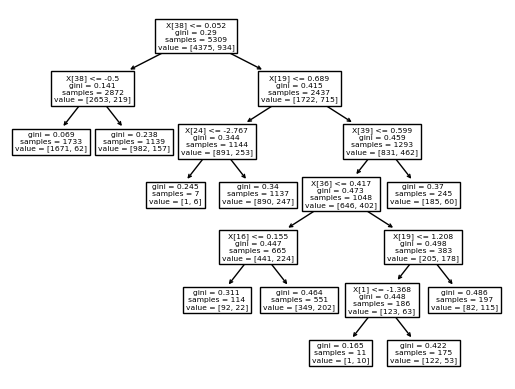

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Plot decision tree
tree.plot_tree(clf)

In [6]:
preds = clf.predict(X_test)
acc = accuracy_score(y_test, preds)
f1 = f1_score(y_test, preds)
rec = recall_score(y_test, preds)

acc, f1, rec

(0.8242937853107345, 0.15718157181571815, 0.09666666666666666)

In [7]:
import numpy as np

x = df[['samerace', 'attractive', 'sincere', 'intelligence', 'funny']]
y = df[['importance_same_race', 'attractive_important', 'sincere_important', 'intellicence_important', 'funny_important']]

#correlation matrix
correlation = x, y.corr()
print(correlation)

(      samerace  attractive  sincere  intelligence  funny
0            0         6.0      8.0           8.0    8.0
1            0         6.0      8.0           8.0    8.0
2            0         6.0      8.0           8.0    8.0
3            0         6.0      8.0           8.0    8.0
4            0         6.0      8.0           8.0    8.0
...        ...         ...      ...           ...    ...
7074         1         8.0      7.0           6.0    7.0
7075         0         8.0      7.0           6.0    7.0
7076         0         8.0      7.0           6.0    7.0
7077         0         8.0      7.0           6.0    7.0
7078         0         8.0      7.0           6.0    7.0

[7079 rows x 5 columns],                         importance_same_race  attractive_important  \
importance_same_race                1.000000             -0.008835   
attractive_important               -0.008835              1.000000   
sincere_important                  -0.078479             -0.422142   
intellice

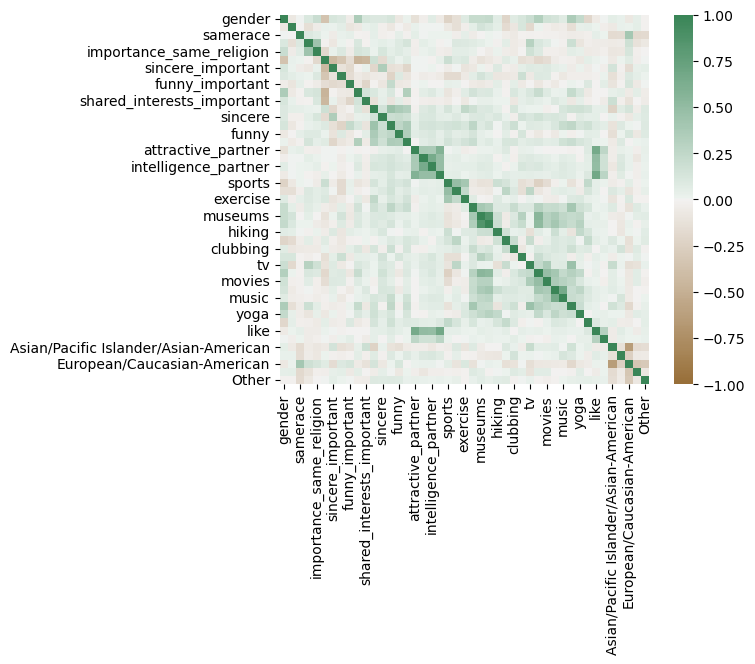

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation = df.corr()

axis_corr = sns.heatmap(
correlation,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

plt.show()

In [10]:
#sports tvsports exercise dining museums art hiking gaming clubbing reading tv theater movies concerts music shopping yoga

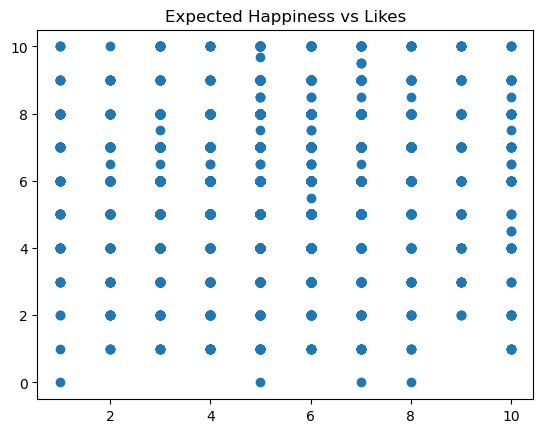

In [11]:
x = df['expected_happy_with_sd_people']
y = df['like']

plt.scatter(x, y)
plt.title('Expected Happiness vs Likes')
plt.show() 

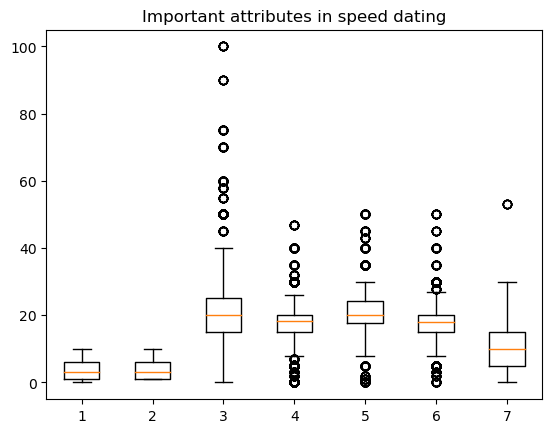

In [12]:
important_attrs = df[['importance_same_race', 'importance_same_religion', 'attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', 'ambtition_important']]

plt.boxplot(important_attrs)
plt.title('Important attributes in speed dating')
plt.show()

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

race_gender_df = df[['gender','Asian/Pacific Islander/Asian-American', 'Black/African American', 'European/Caucasian-American', 'Latino/Hispanic American', 'Other']]
race_gender_df

,gender,Asian/Pacific Islander/Asian-American,Black/African American,European/Caucasian-American,Latino/Hispanic American,Other
0,1,1,0,0,0,0
1,1,1,0,0,0,0
2,1,1,0,0,0,0
3,1,1,0,0,0,0
4,1,1,0,0,0,0
...,...,...,...,...,...,...
7074,0,0,0,1,0,0
7075,0,0,0,1,0,0
7076,0,0,0,1,0,0
7077,0,0,0,1,0,0


<AxesSubplot: xlabel='Asian/Pacific Islander/Asian-American', ylabel='count'>

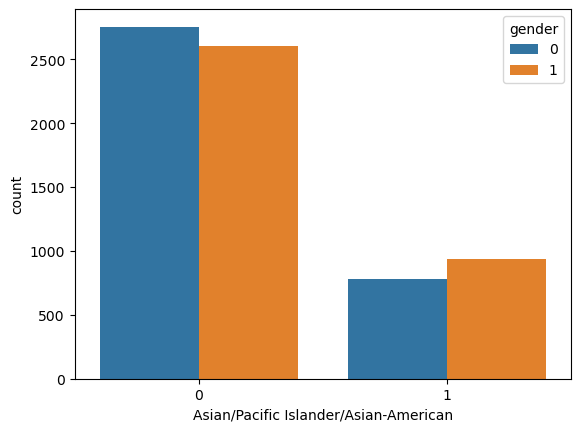

In [14]:
sns.countplot(race_gender_df, x = 'Asian/Pacific Islander/Asian-American', hue = 'gender')

<AxesSubplot: xlabel='Black/African American', ylabel='count'>

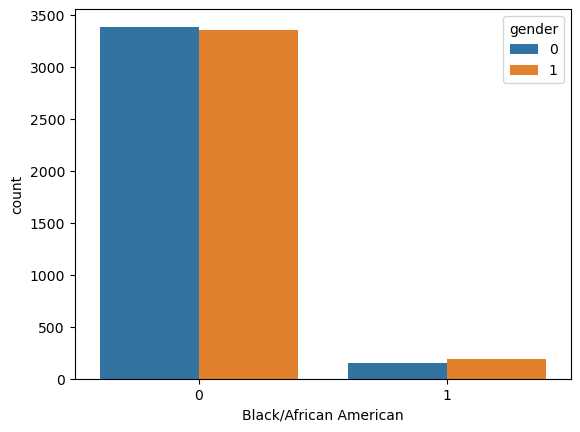

In [15]:
sns.countplot(race_gender_df, x = 'Black/African American', hue = 'gender')

<AxesSubplot: xlabel='European/Caucasian-American', ylabel='count'>

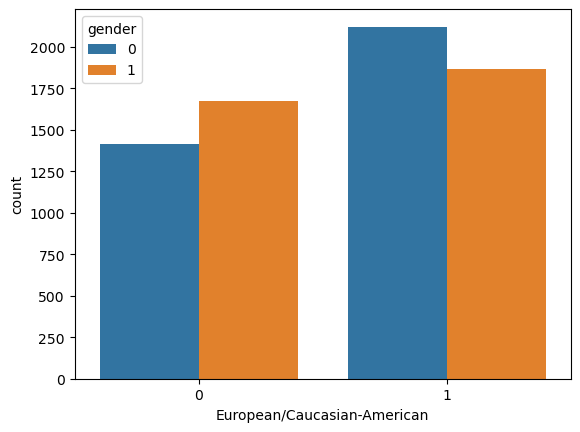

In [16]:
sns.countplot(race_gender_df, x = 'European/Caucasian-American', hue = 'gender')

<AxesSubplot: xlabel='Latino/Hispanic American', ylabel='count'>

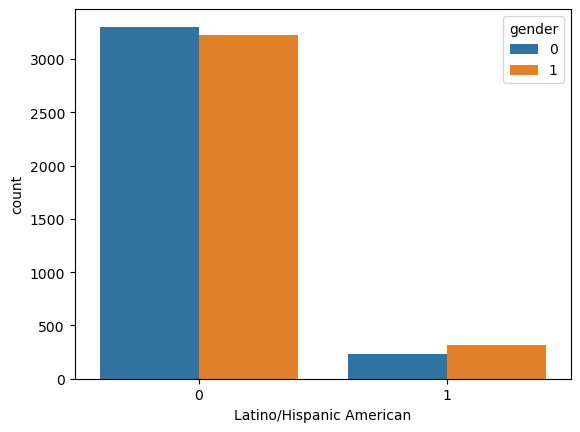

In [17]:
sns.countplot(race_gender_df, x = 'Latino/Hispanic American', hue = 'gender')

<AxesSubplot: xlabel='Other', ylabel='count'>

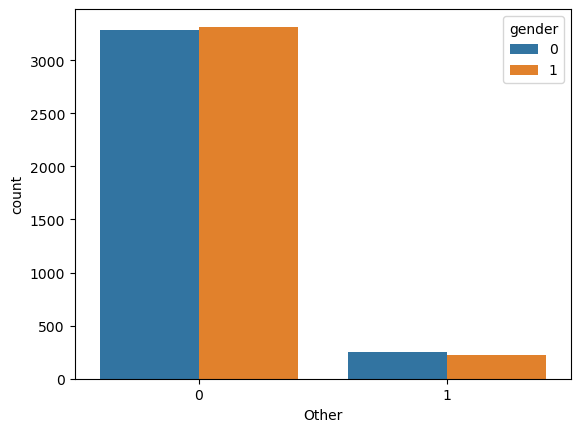

In [18]:
sns.countplot(race_gender_df, x = 'Other', hue = 'gender')